<a href="https://colab.research.google.com/github/annisapa/Klasifikasi-RPS/blob/main/rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-08 14:32:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.0MB/s    in 33s     

2020-07-08 14:32:48 (9.28 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'paper', 'rock', 'scissors']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = '/tmp/rockpaperscissors/train'
validation_dir = '/tmp/rockpaperscissors/val'

# membuat folder train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
rock_dir = '/tmp/rockpaperscissors/rock'
paper_dir = '/tmp/rockpaperscissors/paper'
scissors_dir = '/tmp/rockpaperscissors/scissors'

In [ ]:
from sklearn.model_selection import train_test_split
# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)


In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# meng copy data train dan data val ke directory baru
import shutil

for x in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, x), os.path.join(train_rock, x))
for x in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,x), os.path.join(train_paper,x))
for x in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,x), os.path.join(train_scissors,x))

for x in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, x), os.path.join(val_rock,x))
for x in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,x), os.path.join(val_paper,x))
for x in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,x), os.path.join(val_scissors,x))

In [ ]:
#Jumlah data 
print('Training Dataset Count')
print('rock images:',len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print('paper images:',len(os.listdir('/tmp/rockpaperscissors/train/paper')))
print('scissors images:',len(os.listdir('/tmp/rockpaperscissors/train/scissors')))


Training Dataset Count
rock images: 580
paper images: 569
scissors images: 600


In [ ]:
print('Validation Dataset Count'),
print('rock images',len(os.listdir('/tmp/rockpaperscissors/val/rock')))
print('paper images',len(os.listdir('/tmp/rockpaperscissors/val/paper')))
print('scissors images',len(os.listdir('/tmp/rockpaperscissors/val/scissors')))

Validation Dataset Count
rock images 146
paper images 143
scissors images 150


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# membuat image data generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')


Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
# membuat model 
rps_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')])


In [ ]:
#compile model
rps_model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
#Training
history = rps_model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2)


Epoch 1/20
25/25 - 6s - loss: 1.1601 - accuracy: 0.4068 - val_loss: 1.0227 - val_accuracy: 0.4375
Epoch 2/20
25/25 - 6s - loss: 0.8294 - accuracy: 0.6212 - val_loss: 0.4826 - val_accuracy: 0.8313
Epoch 3/20
25/25 - 6s - loss: 0.4023 - accuracy: 0.8537 - val_loss: 0.2468 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 6s - loss: 0.2590 - accuracy: 0.9000 - val_loss: 0.1666 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 6s - loss: 0.2410 - accuracy: 0.9150 - val_loss: 0.1907 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 6s - loss: 0.1893 - accuracy: 0.9354 - val_loss: 0.1608 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 6s - loss: 0.1661 - accuracy: 0.9366 - val_loss: 0.1706 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 6s - loss: 0.2295 - accuracy: 0.9113 - val_loss: 0.1814 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 6s - loss: 0.1674 - accuracy: 0.9375 - val_loss: 0.0637 - val_accuracy: 0.9875
Epoch 10/20
25/25 - 6s - loss: 0.1051 - accuracy: 0.9632 - val_loss: 0.0863 - val_accuracy: 0.9625
Epoch 11/20
25/25 -

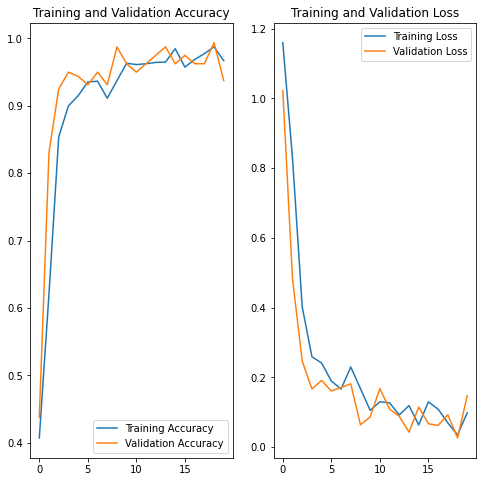

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9.png
1CXgK9fgGdSRggD9.png
scissors


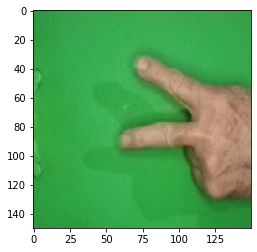

In [ ]:

import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  
  #predict
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = rps_model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')